<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/radiowave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Example: RF Signal Classification with Deep Learning

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 126, 64)             │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 63, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 61, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 28, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 14, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1792)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         229,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 304,710 (1.16 MB)

 Trainable params: 304,710 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 142ms/step - accuracy: 0.4658 - loss: 1.1736 - val_accuracy: 0.8448 - val_loss: 0.2230
Epoch 2/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.8899 - loss: 0.2396 - val_accuracy: 0.9823 - val_loss: 0.0737
Epoch 3/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.9739 - loss: 0.0811 - val_accuracy: 0.9885 - val_loss: 0.0372
Epoch 4/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9830 - loss: 0.0586 - val_accuracy: 0.9854 - val_loss: 0.0551
Epoch 5/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9659 - loss: 0.0978 - val_accuracy: 0.9885 - val_loss: 0.0377
Epoch 6/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9912 - loss: 0.0315 - val_accuracy: 0.9896 - val_loss: 0.0334
Epoch 7/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.9868 - loss: 0.0468 - val_accuracy: 0.9865 - val_loss: 0.0400
Epoch 8/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.9781 - loss: 0.0601 - val_accuracy: 0.9906

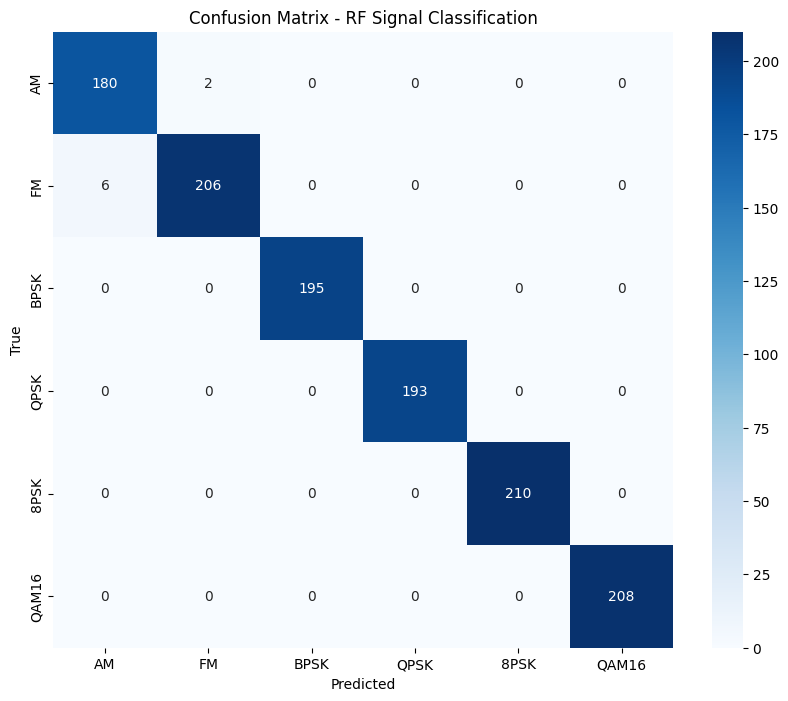


Classification Report:
              precision    recall  f1-score   support

          AM       0.97      0.99      0.98       182
          FM       0.99      0.97      0.98       212
        BPSK       1.00      1.00      1.00       195
        QPSK       1.00      1.00      1.00       193
        8PSK       1.00      1.00      1.00       210
       QAM16       1.00      1.00      1.00       208

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



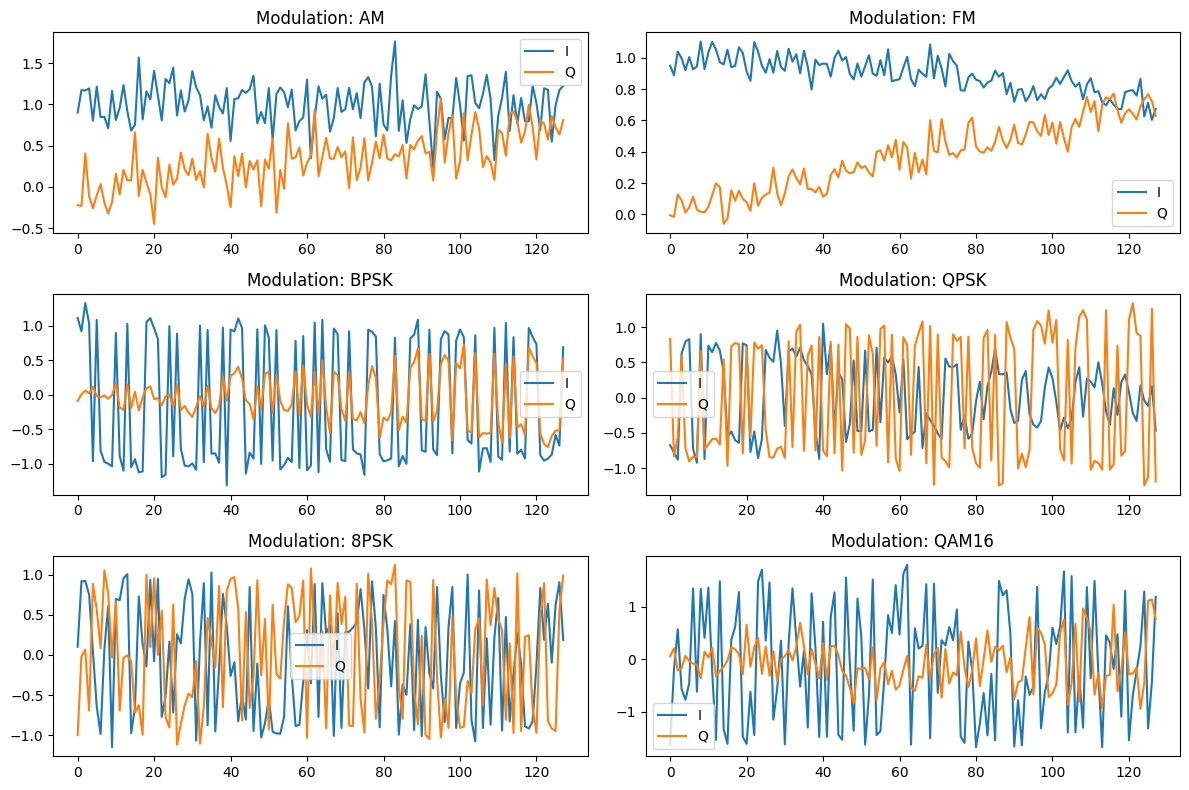

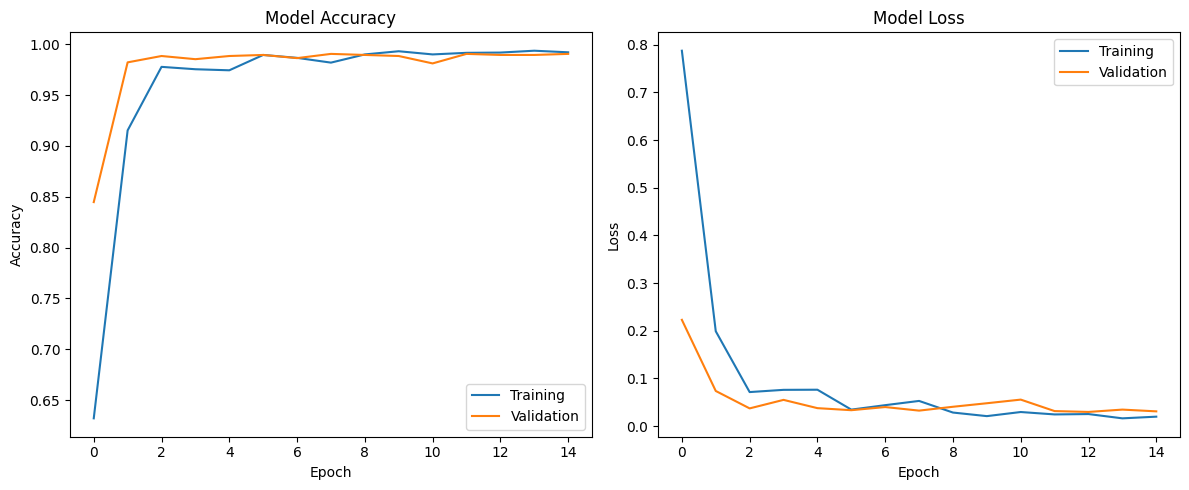

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# This example shows how to build a CNN for classifying RF signals
# based on approaches similar to those used in spectrum awareness applications

# Function to generate synthetic RF signal data with different modulation types
# In a real application, you would use actual captured signals
def generate_synthetic_rf_data(num_samples=1000, signal_length=128):
    # Modulation types: AM, FM, PSK, QAM, etc.
    modulation_types = ['AM', 'FM', 'BPSK', 'QPSK', '8PSK', 'QAM16']
    num_classes = len(modulation_types)

    X = np.zeros((num_samples, signal_length, 2))  # IQ samples (complex signals)
    y = np.zeros(num_samples, dtype=int)

    for i in range(num_samples):
        mod_type = i % num_classes  # Assign modulation type
        y[i] = mod_type

        # Generate carrier signal
        t = np.linspace(0, 1, signal_length)
        fc = 0.1  # Normalized carrier frequency

        # Generate baseband signal based on modulation type
        if mod_type == 0:  # AM
            message = np.sin(2 * np.pi * 0.05 * t)
            amplitude = 1 + 0.5 * message
            I = amplitude * np.cos(2 * np.pi * fc * t)
            Q = amplitude * np.sin(2 * np.pi * fc * t)

        elif mod_type == 1:  # FM
            message = np.sin(2 * np.pi * 0.05 * t)
            phase = 2 * np.pi * fc * t + 0.5 * message
            I = np.cos(phase)
            Q = np.sin(phase)

        elif mod_type == 2:  # BPSK
            bits = np.random.randint(0, 2, signal_length)
            phase = np.pi * bits
            I = np.cos(2 * np.pi * fc * t + phase)
            Q = np.sin(2 * np.pi * fc * t + phase)

        elif mod_type == 3:  # QPSK
            bits_I = np.random.randint(0, 2, signal_length)
            bits_Q = np.random.randint(0, 2, signal_length)
            phase_I = np.pi/4 + np.pi * bits_I
            phase_Q = np.pi/4 + np.pi * bits_Q
            I = np.cos(2 * np.pi * fc * t + phase_I)
            Q = np.sin(2 * np.pi * fc * t + phase_Q)

        elif mod_type == 4:  # 8PSK
            symbols = np.random.randint(0, 8, signal_length)
            phase = symbols * (np.pi/4)
            I = np.cos(2 * np.pi * fc * t + phase)
            Q = np.sin(2 * np.pi * fc * t + phase)

        else:  # QAM16
            bits_I = np.random.randint(0, 4, signal_length) - 1.5
            bits_Q = np.random.randint(0, 4, signal_length) - 1.5
            I = bits_I * np.cos(2 * np.pi * fc * t)
            Q = bits_Q * np.sin(2 * np.pi * fc * t)

        # Add noise
        snr_db = np.random.uniform(5, 20)  # Random SNR between 5 and 20 dB
        snr = 10 ** (snr_db/10)
        Ps = np.sum(I**2 + Q**2) / signal_length  # Signal power
        N0 = Ps / snr  # Noise power
        noise_I = np.random.normal(0, np.sqrt(N0/2), signal_length)
        noise_Q = np.random.normal(0, np.sqrt(N0/2), signal_length)

        # IQ samples with noise
        X[i, :, 0] = I + noise_I
        X[i, :, 1] = Q + noise_Q

    return X, y, modulation_types

# Generate synthetic data
X, y, modulation_types = generate_synthetic_rf_data(num_samples=6000, signal_length=128)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build CNN model for signal classification
def build_model(input_shape, num_classes):
    model = Sequential([
        # First convolutional layer
        Conv1D(64, 3, activation='relu', input_shape=input_shape),
        MaxPooling1D(2),

        # Second convolutional layer
        Conv1D(128, 3, activation='relu'),
        MaxPooling1D(2),

        # Third convolutional layer
        Conv1D(128, 3, activation='relu'),
        MaxPooling1D(2),

        # Flatten and dense layers
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create and train the model
model = build_model(input_shape=(X_train.shape[1], X_train.shape[2]),
                    num_classes=len(modulation_types))

print("Model architecture:")
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=15,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=modulation_types,
            yticklabels=modulation_types)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - RF Signal Classification')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=modulation_types))

# Feature visualization - time domain representation
plt.figure(figsize=(12, 8))
for i, mod_type in enumerate(modulation_types):
    idx = np.where(y_test == i)[0][0]  # Get first sample of this modulation
    plt.subplot(3, 2, i+1)
    plt.plot(X_test[idx, :, 0], label='I')
    plt.plot(X_test[idx, :, 1], label='Q')
    plt.title(f'Modulation: {mod_type}')
    plt.legend()
plt.tight_layout()
plt.show()

# Visualize model performance over epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Additional analysis for spectrum awareness would include:
# 1. Frequency domain analysis (FFT)
# 2. Time-frequency analysis (spectrograms)
# 3. Cyclostationary feature extraction
# 4. Signal detection in noise
# 5. Signal parameter estimation

## Complex Example: SIGINT ML Pipeline for Spectrum Awareness

Simulating SIGINT Workflow for Enhanced Spectrum Awareness
---------------------------------------------------------

Generating synthetic SIGINT dataset...
Generated dataset with 500 signals across 6 signal types

Training signal classifier based on extracted features...
Signal Classifier Accuracy: 0.9200
Classification Report:
              precision    recall  f1-score   support

          am       1.00      0.96      0.98        26
          fm       0.89      0.96      0.92        25
         fsk       0.76      0.68      0.72        19
         psk       0.78      0.82      0.80        22
         qam       1.00      1.00      1.00        30
     unknown       1.00      1.00      1.00        28

    accuracy                           0.92       150
   macro avg       0.91      0.90      0.90       150
weighted avg       0.92      0.92      0.92       150


Generating spectrograms for deep learning analysis...


<ipython-input-2-3145cb25ae29>:331: UserWarning: Input data is complex, switching to return_onesided=False
  f, t, Sxx = signal.spectrogram(



Training deep learning model on spectrograms...
Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 788ms/step - accuracy: 0.1732 - loss: 2.1307 - val_accuracy: 0.2714 - val_loss: 1.7783
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 532ms/step - accuracy: 0.1651 - loss: 1.7922 - val_accuracy: 0.1571 - val_loss: 1.7791
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 811ms/step - accuracy: 0.2108 - loss: 1.7602 - val_accuracy: 0.1571 - val_loss: 1.7745
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 809ms/step - accuracy: 0.2038 - loss: 1.7695 - val_accuracy: 0.1571 - val_loss: 1.7613
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 611ms/step - accuracy: 0.2185 - loss: 1.7528 - val_accuracy: 0.1571 - val_loss: 1.7606
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 555ms/step - accuracy: 0.1826 - loss: 1.7545 - val_accuracy: 0.1571 - val_loss: 1.7475
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 686ms/step - accuracy: 0.2184 - loss: 1.7047 - val_accuracy: 0.1571 - val_loss: 1.7247
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 653ms/step - accuracy: 0.231

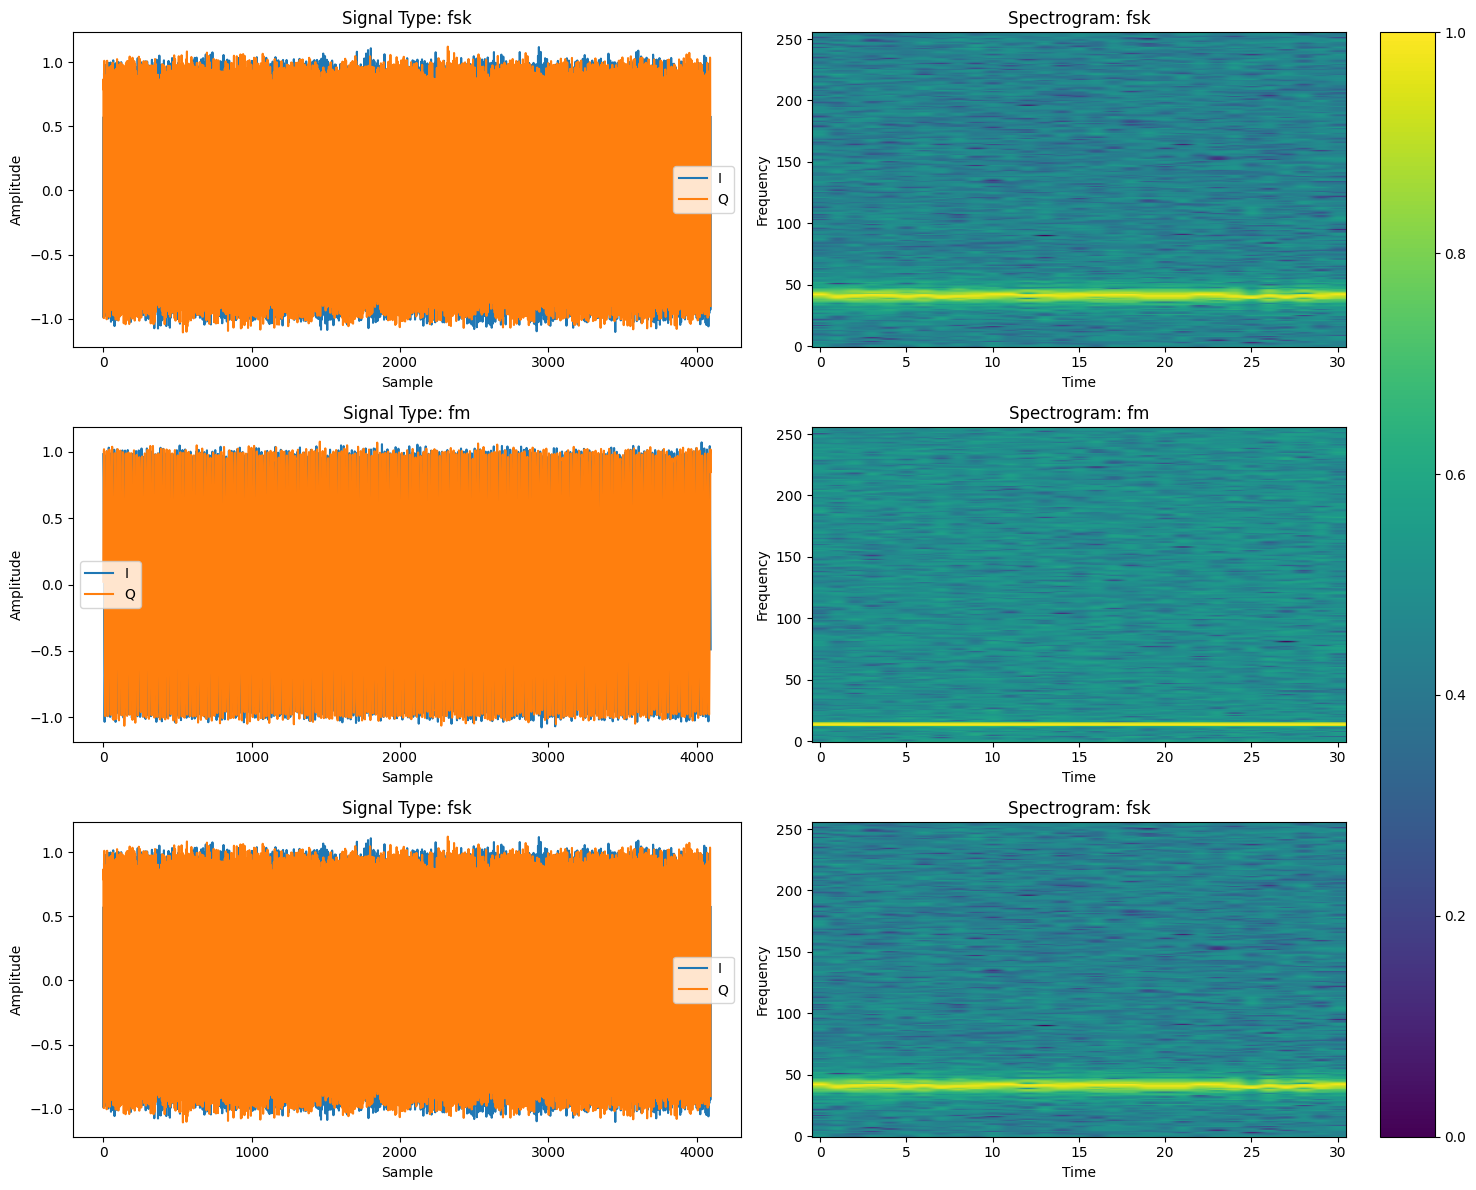

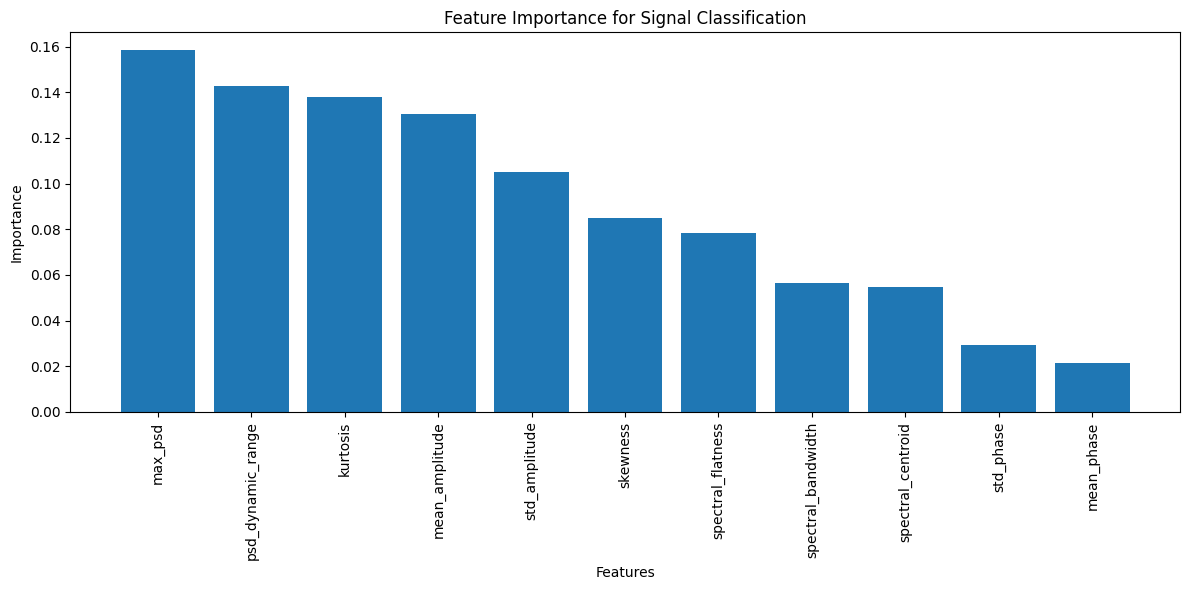


SIGINT workflow simulation complete


In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, concatenate
import tensorflow as tf

# Enhanced Spectrum Awareness and SIGINT Pipeline Example
# This example demonstrates a more complete workflow including:
# 1. Signal detection
# 2. Signal classification
# 3. Emitter identification
# 4. Anomaly detection

# Step 1: Signal Detection - Energy Detection
def energy_detector(iq_samples, threshold, window_size=64):
    """
    Detect signals using energy detection method

    Args:
        iq_samples: Complex IQ samples
        threshold: Energy threshold for detection
        window_size: Window size for energy calculation

    Returns:
        detected_signals: List of (start, end) indices of detected signals
    """
    # Calculate energy
    energy = np.abs(iq_samples)**2

    # Calculate moving average energy
    energy_avg = np.convolve(energy, np.ones(window_size)/window_size, mode='same')

    # Find regions above threshold
    above_threshold = energy_avg > threshold

    # Find signal boundaries
    detected_signals = []
    in_signal = False
    start_idx = 0

    for i, above in enumerate(above_threshold):
        if above and not in_signal:
            # Signal start
            in_signal = True
            start_idx = i
        elif not above and in_signal:
            # Signal end
            in_signal = False
            detected_signals.append((start_idx, i))

    # Handle case where signal continues to the end
    if in_signal:
        detected_signals.append((start_idx, len(above_threshold) - 1))

    return detected_signals

# Step 2: Feature Extraction
def extract_features(iq_samples, fs):
    """
    Extract features from IQ samples for classification

    Args:
        iq_samples: Complex IQ samples
        fs: Sampling frequency

    Returns:
        features: Dictionary of features
    """
    # Time domain features
    amplitude = np.abs(iq_samples)
    phase = np.angle(iq_samples)

    # Frequency domain features
    f, psd = signal.welch(iq_samples, fs=fs, nperseg=1024, return_onesided=False)
    f = np.fft.fftshift(f)
    psd = np.fft.fftshift(psd)

    # Spectral features
    spectral_centroid = np.sum(f * psd) / np.sum(psd)
    spectral_bandwidth = np.sqrt(np.sum(((f - spectral_centroid) ** 2) * psd) / np.sum(psd))
    spectral_flatness = np.exp(np.mean(np.log(psd + 1e-10))) / np.mean(psd)

    # Statistical features
    features = {
        # Time domain
        'mean_amplitude': np.mean(amplitude),
        'std_amplitude': np.std(amplitude),
        'mean_phase': np.mean(phase),
        'std_phase': np.std(phase),

        # Frequency domain
        'spectral_centroid': spectral_centroid,
        'spectral_bandwidth': spectral_bandwidth,
        'spectral_flatness': spectral_flatness,
        'max_psd': np.max(psd),
        'psd_dynamic_range': np.max(psd) / np.mean(psd),

        # Higher-order statistics
        'kurtosis': np.mean((amplitude - np.mean(amplitude))**4) / (np.std(amplitude)**4),
        'skewness': np.mean((amplitude - np.mean(amplitude))**3) / (np.std(amplitude)**3),
    }

    return features, psd, f

# Step 3: Generate Synthetic Dataset
def generate_sigint_dataset(num_samples=500, sample_length=4096, fs=1e6):
    """
    Generate synthetic SIGINT dataset with various signal types
    """
    signal_types = ['unknown', 'am', 'fm', 'psk', 'fsk', 'qam']
    dataset = []
    raw_signals = []
    labels = []

    for i in range(num_samples):
        # Select signal type
        signal_type_idx = np.random.randint(0, len(signal_types))
        signal_type = signal_types[signal_type_idx]

        # Generate time base
        t = np.arange(sample_length) / fs

        # Generate carrier frequency
        fc = np.random.uniform(0.1, 0.4) * fs/2

        # Generate noise
        snr_db = np.random.uniform(5, 30)

        # Generate specific signal type
        if signal_type == 'unknown':
            # Noise only
            iq_samples = np.random.normal(0, 1, sample_length) + 1j * np.random.normal(0, 1, sample_length)

        elif signal_type == 'am':
            # AM signal
            mod_freq = np.random.uniform(100, 5000)
            mod_idx = np.random.uniform(0.2, 0.8)
            message = np.sin(2 * np.pi * mod_freq * t)
            carrier = np.exp(1j * 2 * np.pi * fc * t)
            iq_samples = (1 + mod_idx * message) * carrier

        elif signal_type == 'fm':
            # FM signal
            mod_freq = np.random.uniform(100, 5000)
            mod_idx = np.random.uniform(0.2, 1.0)
            message = np.sin(2 * np.pi * mod_freq * t)
            phase = 2 * np.pi * fc * t + mod_idx * message
            iq_samples = np.exp(1j * phase)

        elif signal_type == 'psk':
            # PSK signal (BPSK, QPSK, 8PSK)
            order = np.random.choice([2, 4, 8])
            symbol_rate = np.random.uniform(1000, 50000)
            symbols_per_sample = int(sample_length * symbol_rate / fs)

            # Generate random symbols
            symbols = np.random.randint(0, order, symbols_per_sample)

            # Map symbols to phases
            phases = symbols * (2 * np.pi / order)

            # Upsample to full signal length
            symbol_indices = np.floor(np.arange(sample_length) * symbols_per_sample / sample_length).astype(int)
            signal_phases = phases[symbol_indices]

            # Apply carrier
            carrier_phase = 2 * np.pi * fc * t
            iq_samples = np.exp(1j * (carrier_phase + signal_phases))

        elif signal_type == 'fsk':
            # FSK signal
            order = np.random.choice([2, 4, 8])
            symbol_rate = np.random.uniform(1000, 50000)
            freq_deviation = np.random.uniform(1000, 10000)
            symbols_per_sample = int(sample_length * symbol_rate / fs)

            # Generate random symbols
            symbols = np.random.randint(0, order, symbols_per_sample)

            # Map symbols to frequencies
            freqs = fc + (symbols - (order - 1) / 2) * freq_deviation

            # Upsample to full signal length
            symbol_indices = np.floor(np.arange(sample_length) * symbols_per_sample / sample_length).astype(int)
            signal_freqs = freqs[symbol_indices]

            # Generate signal
            phase = 2 * np.pi * np.cumsum(signal_freqs) / fs
            iq_samples = np.exp(1j * phase)

        elif signal_type == 'qam':
            # QAM signal
            order = np.random.choice([16, 64])
            symbol_rate = np.random.uniform(1000, 50000)
            symbols_per_sample = int(sample_length * symbol_rate / fs)

            # Generate random symbols
            symbols_I = np.random.randint(0, int(np.sqrt(order)), symbols_per_sample) - (np.sqrt(order) - 1) / 2
            symbols_Q = np.random.randint(0, int(np.sqrt(order)), symbols_per_sample) - (np.sqrt(order) - 1) / 2

            # Upsample to full signal length
            symbol_indices = np.floor(np.arange(sample_length) * symbols_per_sample / sample_length).astype(int)
            signal_I = symbols_I[symbol_indices]
            signal_Q = symbols_Q[symbol_indices]

            # Apply carrier
            carrier = np.exp(1j * 2 * np.pi * fc * t)
            iq_samples = (signal_I + 1j * signal_Q) * carrier

        # Add noise
        signal_power = np.mean(np.abs(iq_samples) ** 2)
        noise_power = signal_power / (10 ** (snr_db / 10))
        noise = np.sqrt(noise_power / 2) * (np.random.normal(0, 1, sample_length) + 1j * np.random.normal(0, 1, sample_length))
        iq_samples = iq_samples + noise

        # Extract features
        features, psd, freq = extract_features(iq_samples, fs)
        features['signal_type'] = signal_type
        dataset.append(features)
        raw_signals.append(iq_samples)
        labels.append(signal_type_idx)

    # Convert to DataFrame
    df = pd.DataFrame(dataset)

    return df, raw_signals, labels, signal_types

# Step 4: Implement Signal Classifier
def train_signal_classifier(df):
    """
    Train a classifier for signal type identification

    Args:
        df: DataFrame containing signal features and types

    Returns:
        trained_model: Trained classifier model
    """
    # Prepare data
    X = df.drop('signal_type', axis=1)
    y = df['signal_type']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_scaled, y_train)

    # Evaluate
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Signal Classifier Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)

    return clf, scaler

# Step 5: Implement Deep Learning for Spectrogram Analysis
def create_spectrogram_cnn(input_shape, num_classes):
    """
    Create a CNN model for spectrogram analysis

    Args:
        input_shape: Shape of input spectrogram
        num_classes: Number of signal classes

    Returns:
        model: Compiled CNN model
    """
    inputs = Input(shape=input_shape)

    # Convolutional layers
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Fully connected layers
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Step 6: Generate Spectrograms
def generate_spectrograms(signals, fs, window_size=256, overlap=128):
    """
    Generate spectrograms from signals

    Args:
        signals: List of IQ sample arrays
        fs: Sampling frequency
        window_size: FFT window size
        overlap: Overlap between windows

    Returns:
        spectrograms: List of spectrogram arrays
    """
    spectrograms = []

    for sig in signals:
        # Generate spectrogram
        f, t, Sxx = signal.spectrogram(
            sig,
            fs=fs,
            window=('hamming'),
            nperseg=window_size,
            noverlap=overlap,
            scaling='density',
            mode='complex'
        )

        # Convert to dB
        Sxx_db = 10 * np.log10(np.abs(Sxx) + 1e-10)

        # Normalize
        Sxx_db_norm = (Sxx_db - np.min(Sxx_db)) / (np.max(Sxx_db) - np.min(Sxx_db))

        spectrograms.append(Sxx_db_norm)

    return spectrograms

# Step 7: Anomaly Detection
def detect_anomalies(features_df, threshold=0.9):
    """
    Detect anomalous signals using DBSCAN clustering

    Args:
        features_df: DataFrame with signal features
        threshold: Outlier score threshold

    Returns:
        anomalies: Boolean array indicating anomalous signals
    """
    # Prepare data
    X = features_df.drop('signal_type', axis=1)

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    clusters = dbscan.fit_predict(X_scaled)

    # Identify anomalies (points labeled as -1)
    anomalies = clusters == -1

    print(f"Detected {sum(anomalies)} anomalous signals out of {len(X)}")

    return anomalies

# Step 8: Simulated SIGINT Workflow
def simulate_sigint_workflow():
    print("Simulating SIGINT Workflow for Enhanced Spectrum Awareness")
    print("---------------------------------------------------------")

    # 1. Generate synthetic dataset
    print("\nGenerating synthetic SIGINT dataset...")
    df, raw_signals, labels, signal_types = generate_sigint_dataset(num_samples=500)
    print(f"Generated dataset with {len(df)} signals across {len(signal_types)} signal types")

    # 2. Train signal classifier based on extracted features
    print("\nTraining signal classifier based on extracted features...")
    classifier, scaler = train_signal_classifier(df)

    # 3. Generate spectrograms for deep learning
    print("\nGenerating spectrograms for deep learning analysis...")
    spectrograms = generate_spectrograms(raw_signals, fs=1e6)

    # Reshape spectrograms for CNN input (assuming all same shape)
    spectrogram_shape = spectrograms[0].shape
    X_spectro = np.array(spectrograms)
    X_spectro = X_spectro.reshape(-1, spectrogram_shape[0], spectrogram_shape[1], 1)
    y_spectro = np.array(labels)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_spectro, y_spectro, test_size=0.3, random_state=42)

    # 4. Train spectrogram CNN
    print("\nTraining deep learning model on spectrograms...")
    cnn_model = create_spectrogram_cnn((spectrogram_shape[0], spectrogram_shape[1], 1), len(signal_types))
    cnn_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2, verbose=1)

    # Evaluate CNN
    test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
    print(f"Spectrogram CNN Test Accuracy: {test_acc:.4f}")

    # 5. Anomaly detection
    print("\nPerforming anomaly detection to identify unusual signals...")
    anomalies = detect_anomalies(df)

    # 6. Visualize results
    print("\nVisualizing results...")

    # Plot example signals and their spectrograms
    fig, axs = plt.subplots(3, 2, figsize=(15, 12))

    for i in range(3):
        # Select random non-anomalous signal
        non_anomalous_indices = np.where(~anomalies)[0]
        idx = np.random.choice(non_anomalous_indices)

        # Plot IQ data
        axs[i, 0].plot(np.real(raw_signals[idx]), label='I')
        axs[i, 0].plot(np.imag(raw_signals[idx]), label='Q')
        axs[i, 0].set_title(f"Signal Type: {df['signal_type'].iloc[idx]}")
        axs[i, 0].set_xlabel("Sample")
        axs[i, 0].set_ylabel("Amplitude")
        axs[i, 0].legend()

        # Plot spectrogram
        im = axs[i, 1].imshow(spectrograms[idx], aspect='auto', origin='lower', cmap='viridis')
        axs[i, 1].set_title(f"Spectrogram: {df['signal_type'].iloc[idx]}")
        axs[i, 1].set_xlabel("Time")
        axs[i, 1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.colorbar(im, ax=axs[:, 1])

    # Plot feature importance
    feature_names = df.drop('signal_type', axis=1).columns
    importances = classifier.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 6))
    plt.bar(range(len(indices)), importances[indices], align='center')
    plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importance for Signal Classification')
    plt.tight_layout()

    plt.show()

    print("\nSIGINT workflow simulation complete")

# Run the simulation if this script is executed directly
if __name__ == "__main__":
    simulate_sigint_workflow()

## Complete SIGINT Example

Simulating SIGINT Workflow for Enhanced Spectrum Awareness
---------------------------------------------------------

Generating synthetic SIGINT dataset...
Generated 100/800 signals
Generated 200/800 signals
Generated 300/800 signals
Generated 400/800 signals
Generated 500/800 signals
Generated 600/800 signals
Generated 700/800 signals
Generated 800/800 signals
Generated dataset with 800 signals across 8 signal types

Training signal classifier based on extracted features...
Signal Classifier Accuracy: 0.7083
Classification Report:
              precision    recall  f1-score   support

        8psk       0.22      0.29      0.25        21
          am       1.00      1.00      1.00        34
        bpsk       0.22      0.28      0.25        25
          fm       0.91      0.97      0.94        33
         fsk       0.64      0.55      0.59        29
       qam16       1.00      1.00      1.00        33
        qpsk       0.43      0.28      0.34        32
     unknown       1.00     

<ipython-input-5-d956d6046284>:371: UserWarning: Input data is complex, switching to return_onesided=False
  f, t, Sxx = signal.spectrogram(


Generated 200/800 spectrograms
Generated 300/800 spectrograms
Generated 400/800 spectrograms
Generated 500/800 spectrograms
Generated 600/800 spectrograms
Generated 700/800 spectrograms
Generated 800/800 spectrograms

Training deep learning model on spectrograms...
Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.1407 - loss: 2.1307 - val_accuracy: 0.1071 - val_loss: 2.0782
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 677ms/step - accuracy: 0.1022 - loss: 2.0750 - val_accuracy: 0.1071 - val_loss: 2.0921
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 679ms/step - accuracy: 0.1334 - loss: 2.0768 - val_accuracy: 0.1071 - val_loss: 2.0569
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 534ms/step - accuracy: 0.1615 - loss: 2.0541 - val_accuracy: 0.1518 - val_loss: 2.0019
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 710ms/step - accuracy: 0.1900 - loss: 1.9636 - val_accuracy: 0.2679 - val_loss: 1.8306
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 721ms/step - accuracy: 0.2608 - loss: 1.8069 - val_a

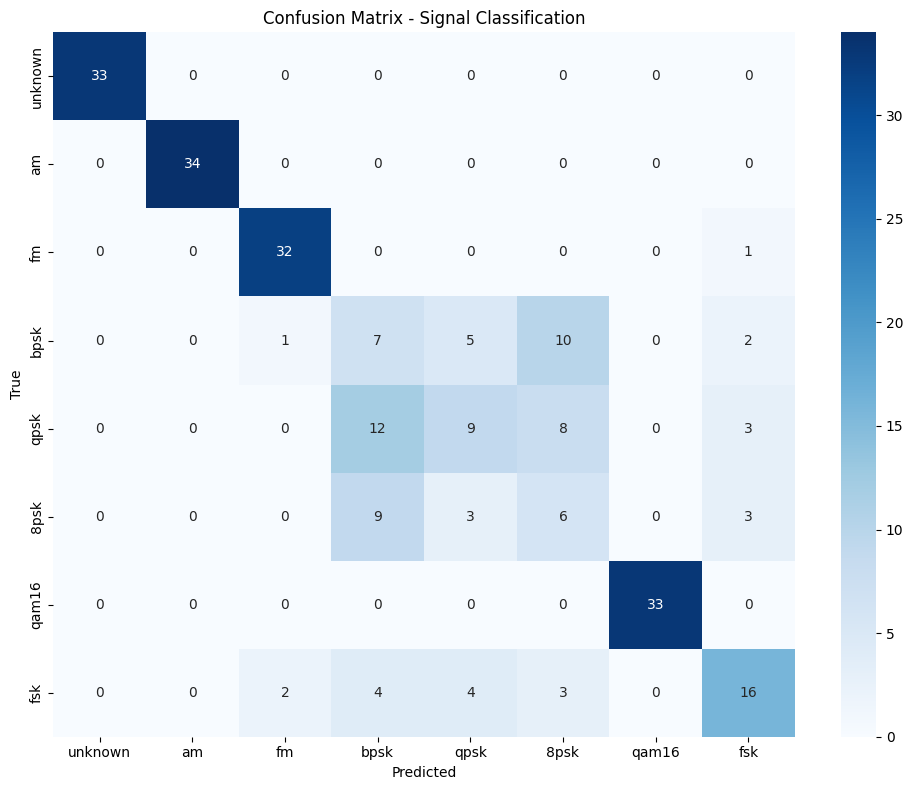

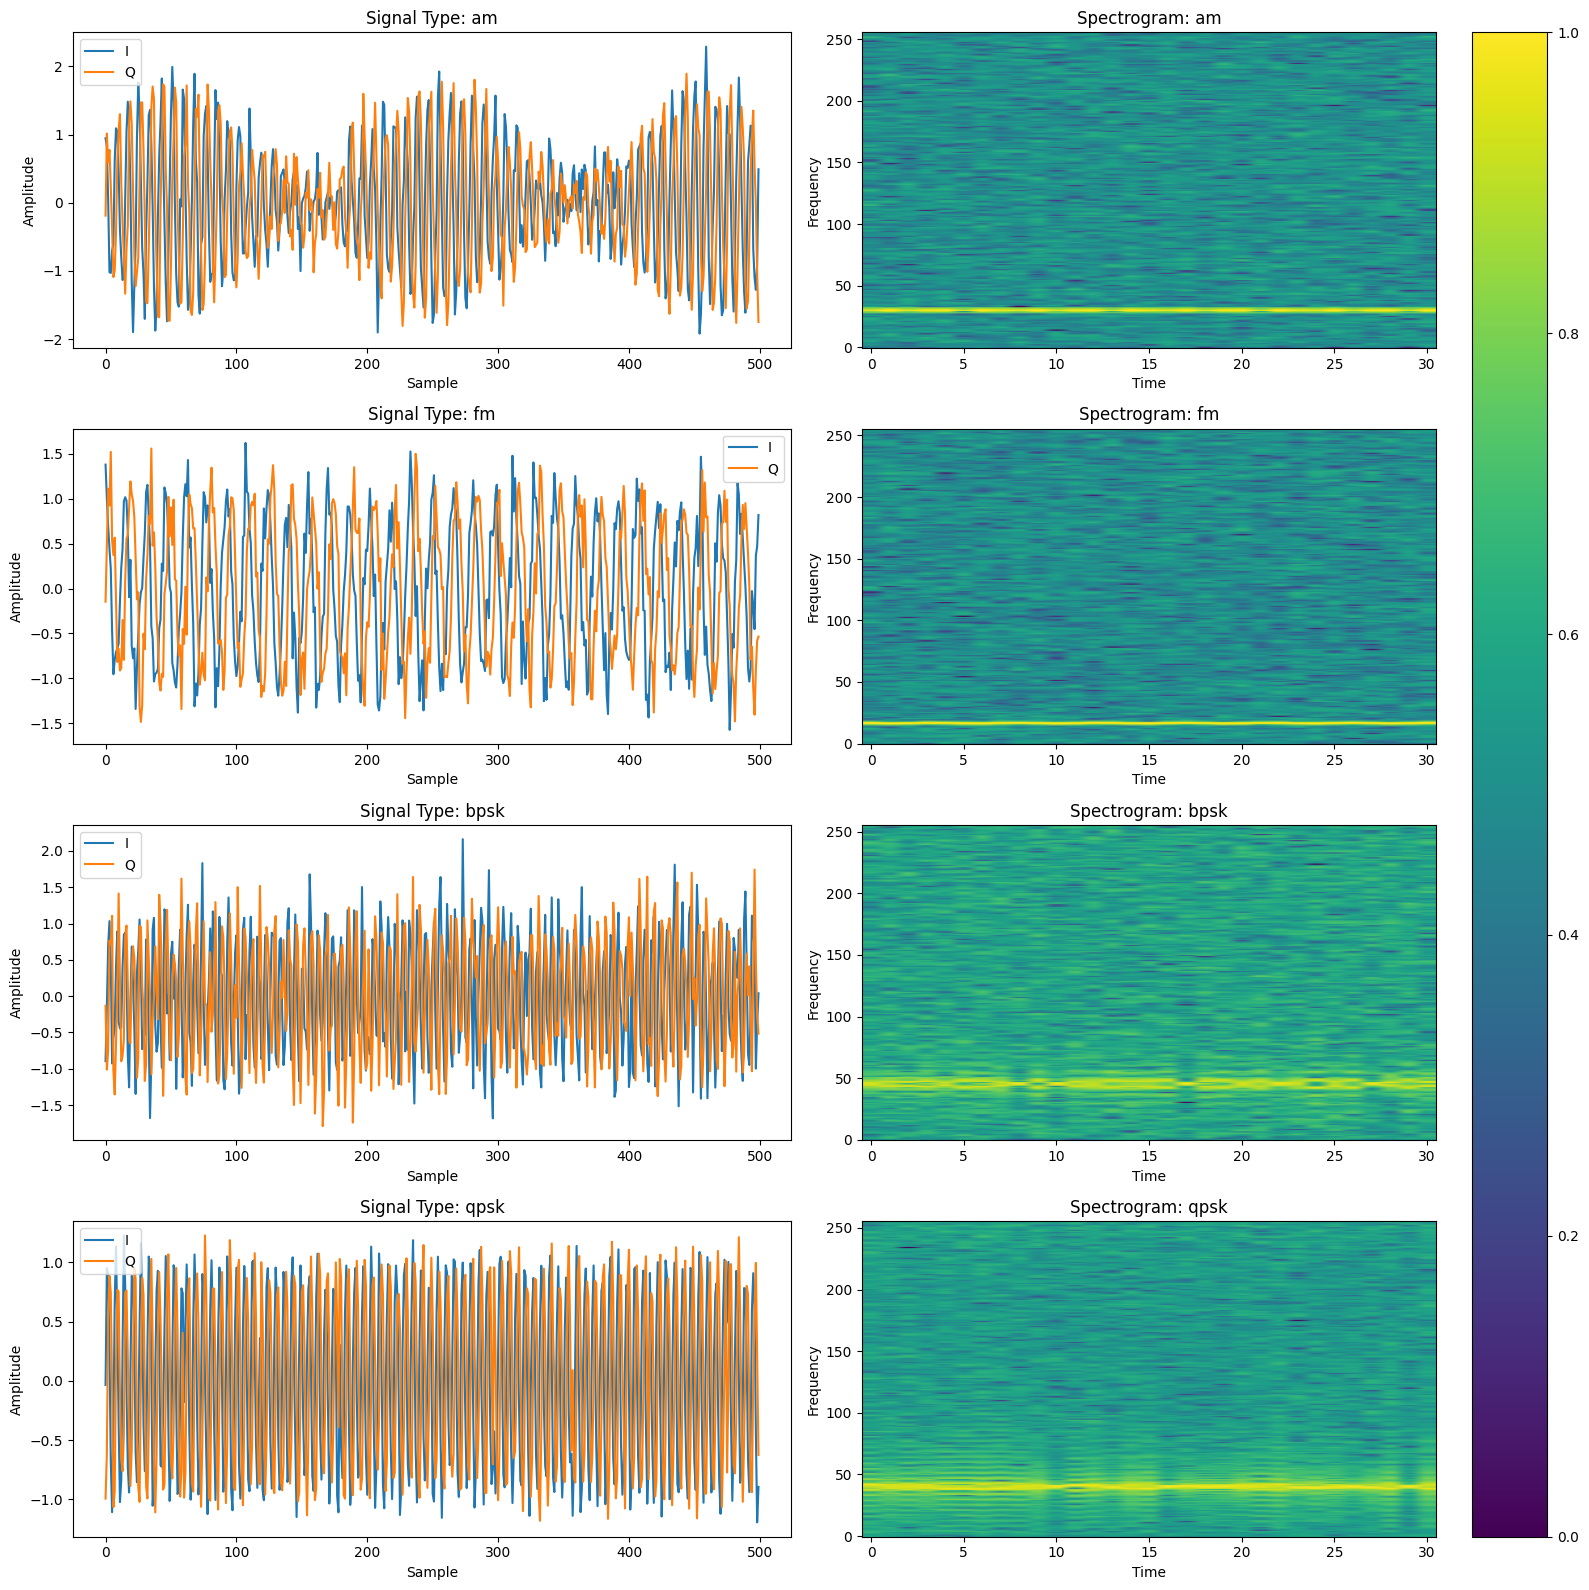

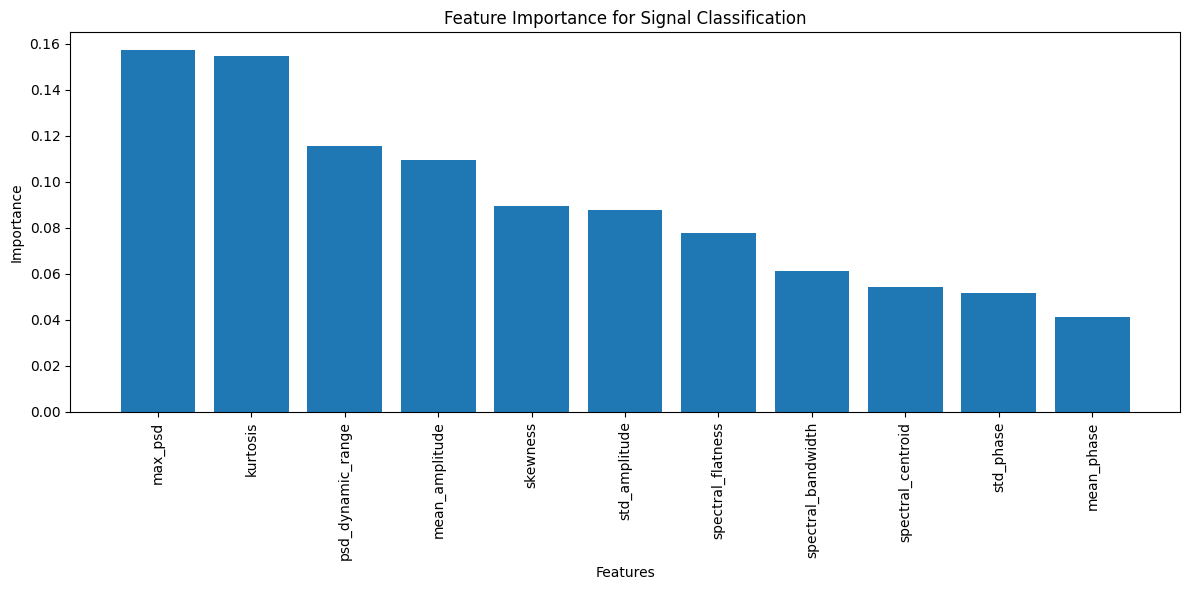


SIGINT workflow simulation complete


In [ ]:
#@title

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, concatenate
import tensorflow as tf

# Enhanced Spectrum Awareness and SIGINT Pipeline Example
# This example demonstrates a more complete workflow including:
# 1. Signal detection
# 2. Signal classification
# 3. Emitter identification
# 4. Anomaly detection

# Step 1: Signal Detection - Energy Detection
def energy_detector(iq_samples, threshold, window_size=64):
    """
    Detect signals using energy detection method

    Args:
        iq_samples: Complex IQ samples
        threshold: Energy threshold for detection
        window_size: Window size for energy calculation

    Returns:
        detected_signals: List of (start, end) indices of detected signals
    """
    # Calculate energy
    energy = np.abs(iq_samples)**2

    # Calculate moving average energy
    energy_avg = np.convolve(energy, np.ones(window_size)/window_size, mode='same')

    # Find regions above threshold
    above_threshold = energy_avg > threshold

    # Find signal boundaries
    detected_signals = []
    in_signal = False
    start_idx = 0

    for i, above in enumerate(above_threshold):
        if above and not in_signal:
            # Signal start
            in_signal = True
            start_idx = i
        elif not above and in_signal:
            # Signal end
            in_signal = False
            detected_signals.append((start_idx, i))

    # Handle case where signal continues to the end
    if in_signal:
        detected_signals.append((start_idx, len(above_threshold) - 1))

    return detected_signals

# Step 2: Feature Extraction
def extract_features(iq_samples, fs):
    """
    Extract features from IQ samples for classification

    Args:
        iq_samples: Complex IQ samples
        fs: Sampling frequency

    Returns:
        features: Dictionary of features
    """
    # Time domain features
    amplitude = np.abs(iq_samples)
    phase = np.angle(iq_samples)

    # Frequency domain features
    f, psd = signal.welch(iq_samples, fs=fs, nperseg=1024, return_onesided=False)
    f = np.fft.fftshift(f)
    psd = np.fft.fftshift(psd)

    # Spectral features
    spectral_centroid = np.sum(f * psd) / np.sum(psd)
    spectral_bandwidth = np.sqrt(np.sum(((f - spectral_centroid) ** 2) * psd) / np.sum(psd))
    spectral_flatness = np.exp(np.mean(np.log(psd + 1e-10))) / np.mean(psd)

    # Statistical features
    features = {
        # Time domain
        'mean_amplitude': np.mean(amplitude),
        'std_amplitude': np.std(amplitude),
        'mean_phase': np.mean(phase),
        'std_phase': np.std(phase),

        # Frequency domain
        'spectral_centroid': spectral_centroid,
        'spectral_bandwidth': spectral_bandwidth,
        'spectral_flatness': spectral_flatness,
        'max_psd': np.max(psd),
        'psd_dynamic_range': np.max(psd) / np.mean(psd),

        # Higher-order statistics
        'kurtosis': np.mean((amplitude - np.mean(amplitude))**4) / (np.std(amplitude)**4),
        'skewness': np.mean((amplitude - np.mean(amplitude))**3) / (np.std(amplitude)**3),
    }

    return features, psd, f

# Step 3: Generate Synthetic Dataset with More Sophisticated Signal Models
def generate_sigint_dataset(num_samples=500, sample_length=4096, fs=1e6):
    """
    Generate synthetic SIGINT dataset with various signal types using sophisticated signal models
    """
    # Define signal types - enhanced with more specific modulations
    signal_types = ['unknown', 'am', 'fm', 'bpsk', 'qpsk', '8psk', 'qam16', 'fsk']
    dataset = []
    raw_signals = []
    labels = []

    for i in range(num_samples):
        # Select signal type - ensure balanced dataset
        signal_type_idx = i % len(signal_types)
        signal_type = signal_types[signal_type_idx]

        # Generate time base
        t = np.arange(sample_length) / fs

        # Generate carrier frequency (10-40% of Nyquist)
        fc = np.random.uniform(0.1, 0.4) * fs/2

        # Generate SNR between 5 and 30 dB
        snr_db = np.random.uniform(5, 30)

        # Generate specific signal type with enhanced sophistication
        if signal_type == 'unknown':
            # Noise only
            iq_samples = np.random.normal(0, 1, sample_length) + 1j * np.random.normal(0, 1, sample_length)

        elif signal_type == 'am':
            # AM signal with random modulation frequency and depth
            mod_freq = np.random.uniform(100, 5000)
            mod_depth = np.random.uniform(0.2, 0.9)
            message = np.sin(2 * np.pi * mod_freq * t)
            iq_samples = (1 + mod_depth * message) * np.exp(1j * 2 * np.pi * fc * t)

        elif signal_type == 'fm':
            # FM signal with random modulation frequency and index
            mod_freq = np.random.uniform(100, 5000)
            mod_idx = np.random.uniform(0.2, 1.0)
            message = np.sin(2 * np.pi * mod_freq * t)
            phase = 2 * np.pi * fc * t + mod_idx * message
            iq_samples = np.exp(1j * phase)

        elif signal_type == 'bpsk':
            # BPSK with random symbol rate
            symbol_rate = np.random.uniform(1000, 50000)
            symbols_per_sample = int(sample_length * symbol_rate / fs)

            # Generate random symbols
            symbols = np.random.randint(0, 2, symbols_per_sample)

            # Map symbols to phases (0 or π)
            phases = symbols * np.pi

            # Upsample to full signal length
            symbol_indices = np.floor(np.arange(sample_length) * symbols_per_sample / sample_length).astype(int)
            signal_phases = phases[symbol_indices]

            # Apply carrier
            carrier_phase = 2 * np.pi * fc * t
            iq_samples = np.exp(1j * (carrier_phase + signal_phases))

        elif signal_type == 'qpsk':
            # QPSK with random symbol rate
            symbol_rate = np.random.uniform(1000, 50000)
            symbols_per_sample = int(sample_length * symbol_rate / fs)

            # Generate random symbols
            symbols = np.random.randint(0, 4, symbols_per_sample)

            # Map symbols to phases (0, π/2, π, 3π/2)
            phases = symbols * (np.pi/2)

            # Upsample to full signal length
            symbol_indices = np.floor(np.arange(sample_length) * symbols_per_sample / sample_length).astype(int)
            signal_phases = phases[symbol_indices]

            # Apply carrier
            carrier_phase = 2 * np.pi * fc * t
            iq_samples = np.exp(1j * (carrier_phase + signal_phases))

        elif signal_type == '8psk':
            # 8PSK with random symbol rate
            symbol_rate = np.random.uniform(1000, 50000)
            symbols_per_sample = int(sample_length * symbol_rate / fs)

            # Generate random symbols
            symbols = np.random.randint(0, 8, symbols_per_sample)

            # Map symbols to phases
            phases = symbols * (np.pi/4)

            # Upsample to full signal length
            symbol_indices = np.floor(np.arange(sample_length) * symbols_per_sample / sample_length).astype(int)
            signal_phases = phases[symbol_indices]

            # Apply carrier
            carrier_phase = 2 * np.pi * fc * t
            iq_samples = np.exp(1j * (carrier_phase + signal_phases))

        elif signal_type == 'qam16':
            # QAM16 with random symbol rate
            symbol_rate = np.random.uniform(1000, 50000)
            symbols_per_sample = int(sample_length * symbol_rate / fs)

            # Generate random I and Q components (-3, -1, 1, 3)
            symbols_I = 2 * np.random.randint(0, 4, symbols_per_sample) - 3
            symbols_Q = 2 * np.random.randint(0, 4, symbols_per_sample) - 3

            # Upsample to full signal length
            symbol_indices = np.floor(np.arange(sample_length) * symbols_per_sample / sample_length).astype(int)
            signal_I = symbols_I[symbol_indices]
            signal_Q = symbols_Q[symbol_indices]

            # Apply carrier
            carrier = np.exp(1j * 2 * np.pi * fc * t)
            iq_samples = (signal_I + 1j * signal_Q) * carrier / np.sqrt(10)  # Normalize energy

        elif signal_type == 'fsk':
            # FSK with random symbol rate and frequency deviation
            symbol_rate = np.random.uniform(1000, 50000)
            freq_deviation = np.random.uniform(1000, 10000)
            order = np.random.choice([2, 4, 8])  # Binary, 4-ary, or 8-ary FSK
            symbols_per_sample = int(sample_length * symbol_rate / fs)

            # Generate random symbols
            symbols = np.random.randint(0, order, symbols_per_sample)

            # Map symbols to frequencies
            freqs = fc + (symbols - (order - 1) / 2) * freq_deviation

            # Upsample to full signal length
            symbol_indices = np.floor(np.arange(sample_length) * symbols_per_sample / sample_length).astype(int)
            signal_freqs = freqs[symbol_indices]

            # Generate phase by integrating frequency
            phase = 2 * np.pi * np.cumsum(signal_freqs) / fs
            iq_samples = np.exp(1j * phase)

        # Add noise based on SNR
        signal_power = np.mean(np.abs(iq_samples) ** 2)
        noise_power = signal_power / (10 ** (snr_db / 10))
        noise = np.sqrt(noise_power / 2) * (np.random.normal(0, 1, sample_length) + 1j * np.random.normal(0, 1, sample_length))
        iq_samples = iq_samples + noise

        # Extract features
        features, psd, freq = extract_features(iq_samples, fs)
        features['signal_type'] = signal_type
        dataset.append(features)
        raw_signals.append(iq_samples)
        labels.append(signal_type_idx)

        # Progress update for larger datasets
        if (i+1) % 100 == 0:
            print(f"Generated {i+1}/{num_samples} signals")

    # Convert to DataFrame
    df = pd.DataFrame(dataset)

    return df, raw_signals, labels, signal_types

# Step 4: Implement Signal Classifier
def train_signal_classifier(df):
    """
    Train a classifier for signal type identification

    Args:
        df: DataFrame containing signal features and types

    Returns:
        trained_model: Trained classifier model
    """
    # Prepare data
    X = df.drop('signal_type', axis=1)
    y = df['signal_type']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_scaled, y_train)

    # Evaluate
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Signal Classifier Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)

    return clf, scaler, X_test, y_test, y_pred

# Step 5: Implement Deep Learning for Spectrogram Analysis
def create_spectrogram_cnn(input_shape, num_classes):
    """
    Create a CNN model for spectrogram analysis

    Args:
        input_shape: Shape of input spectrogram
        num_classes: Number of signal classes

    Returns:
        model: Compiled CNN model
    """
    inputs = Input(shape=input_shape)

    # Convolutional layers
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Fully connected layers
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Step 6: Generate Spectrograms
def generate_spectrograms(signals, fs, window_size=256, overlap=128):
    """
    Generate spectrograms from signals

    Args:
        signals: List of IQ sample arrays
        fs: Sampling frequency
        window_size: FFT window size
        overlap: Overlap between windows

    Returns:
        spectrograms: List of spectrogram arrays
    """
    spectrograms = []

    for idx, sig in enumerate(signals):
        # Generate spectrogram
        f, t, Sxx = signal.spectrogram(
            sig,
            fs=fs,
            window=('hamming'),
            nperseg=window_size,
            noverlap=overlap,
            scaling='density',
            mode='complex'
        )

        # Convert to dB
        Sxx_db = 10 * np.log10(np.abs(Sxx) + 1e-10)

        # Normalize
        Sxx_db_norm = (Sxx_db - np.min(Sxx_db)) / (np.max(Sxx_db) - np.min(Sxx_db))

        spectrograms.append(Sxx_db_norm)

        # Progress update for larger datasets
        if (idx+1) % 100 == 0:
            print(f"Generated {idx+1}/{len(signals)} spectrograms")

    return spectrograms

# Step 7: Anomaly Detection
def detect_anomalies(features_df, threshold=0.9):
    """
    Detect anomalous signals using DBSCAN clustering

    Args:
        features_df: DataFrame with signal features
        threshold: Outlier score threshold

    Returns:
        anomalies: Boolean array indicating anomalous signals
    """
    # Prepare data
    X = features_df.drop('signal_type', axis=1)

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    clusters = dbscan.fit_predict(X_scaled)

    # Identify anomalies (points labeled as -1)
    anomalies = clusters == -1

    print(f"Detected {sum(anomalies)} anomalous signals out of {len(X)}")

    return anomalies

# Step 8: Simulated SIGINT Workflow
def simulate_sigint_workflow(num_samples=800, sample_length=4096):
    print("Simulating SIGINT Workflow for Enhanced Spectrum Awareness")
    print("---------------------------------------------------------")

    # 1. Generate synthetic dataset with more sophisticated signal models
    print("\nGenerating synthetic SIGINT dataset...")
    df, raw_signals, labels, signal_types = generate_sigint_dataset(
        num_samples=num_samples,
        sample_length=sample_length
    )
    print(f"Generated dataset with {len(df)} signals across {len(signal_types)} signal types")

    # 2. Train signal classifier based on extracted features
    print("\nTraining signal classifier based on extracted features...")
    classifier, scaler, X_test, y_test, y_pred = train_signal_classifier(df)

    # 3. Generate spectrograms for deep learning
    print("\nGenerating spectrograms for deep learning analysis...")
    spectrograms = generate_spectrograms(raw_signals, fs=1e6)

    # Reshape spectrograms for CNN input (assuming all same shape)
    spectrogram_shape = spectrograms[0].shape
    X_spectro = np.array(spectrograms)
    X_spectro = X_spectro.reshape(-1, spectrogram_shape[0], spectrogram_shape[1], 1)
    y_spectro = np.array(labels)

    # Split data
    X_train, X_test, y_train, y_test_cnn = train_test_split(X_spectro, y_spectro, test_size=0.3, random_state=42)

    # 4. Train spectrogram CNN
    print("\nTraining deep learning model on spectrograms...")
    cnn_model = create_spectrogram_cnn((spectrogram_shape[0], spectrogram_shape[1], 1), len(signal_types))
    cnn_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2, verbose=1)

    # Evaluate CNN
    test_loss, test_acc = cnn_model.evaluate(X_test, y_test_cnn)
    print(f"Spectrogram CNN Test Accuracy: {test_acc:.4f}")

    # 5. Anomaly detection
    print("\nPerforming anomaly detection to identify unusual signals...")
    anomalies = detect_anomalies(df)

    # 6. Visualize results
    print("\nVisualizing results...")

    # Plot confusion matrix for the Random Forest classifier
    y_pred_classes = np.array([signal_types.index(pred) for pred in y_pred])
    y_true_classes = np.array([signal_types.index(true) for true in y_test])

    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=signal_types, yticklabels=signal_types)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix - Signal Classification')
    plt.tight_layout()
    plt.show()

    # Plot example signals and their spectrograms
    fig, axs = plt.subplots(4, 2, figsize=(16, 16))

    signal_indices = {}
    for i, label in enumerate(labels):
        signal_type = signal_types[label]
        if signal_type not in signal_indices and signal_type != 'unknown':
            signal_indices[signal_type] = i

    # Select 4 different signal types to display
    selected_types = list(signal_indices.keys())[:4]

    for i, sig_type in enumerate(selected_types):
        idx = signal_indices[sig_type]

        # Plot IQ data (first 500 samples for clarity)
        axs[i, 0].plot(np.real(raw_signals[idx][:500]), label='I')
        axs[i, 0].plot(np.imag(raw_signals[idx][:500]), label='Q')
        axs[i, 0].set_title(f"Signal Type: {sig_type}")
        axs[i, 0].set_xlabel("Sample")
        axs[i, 0].set_ylabel("Amplitude")
        axs[i, 0].legend()

        # Plot spectrogram
        im = axs[i, 1].imshow(spectrograms[idx], aspect='auto', origin='lower', cmap='viridis')
        axs[i, 1].set_title(f"Spectrogram: {sig_type}")
        axs[i, 1].set_xlabel("Time")
        axs[i, 1].set_ylabel("Frequency")

    plt.tight_layout()
    fig.colorbar(im, ax=axs[:, 1])
    plt.show()

    # Plot feature importance
    feature_names = df.drop('signal_type', axis=1).columns
    importances = classifier.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 6))
    plt.bar(range(len(indices)), importances[indices], align='center')
    plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importance for Signal Classification')
    plt.tight_layout()
    plt.show()

    print("\nSIGINT workflow simulation complete")

    # Return important objects for further analysis if needed
    return {
        'classifier': classifier,
        'cnn_model': cnn_model,
        'raw_signals': raw_signals,
        'spectrograms': spectrograms,
        'feature_importance': dict(zip(feature_names, classifier.feature_importances_)),
        'signal_types': signal_types,
        'df': df
    }

# Run the simulation if this script is executed directly
if __name__ == "__main__":
    # Use smaller values for demonstration
    # In a real application, use larger values for better results
    results = simulate_sigint_workflow(num_samples=800, sample_length=4096)

* max_psd (highest importance): Maximum power spectral density - the peak energy in the frequency domain
* psd_dynamic_range: ratio between maximum and average energy in the spectrum
* kurtosis: statistical measure of the tailedness of the amplitude distribution
* mean_amplitude: Average signal strength
* std_amplitude: How much signal strength varies

*The phase-related features (std_phase, mean_phase) are the least important, while frequency domain features dominate. This makes sense for modulation types that primarily differ in how they use frequency rather than phase.*
